In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

探究5%票面利息与10年的一支债券的久期变化

In [25]:
y=np.linspace(0.06,0.12,30)

In [26]:
p=9/y*(1-1/(1+y/2)**10)+100/(1+y/2)**10

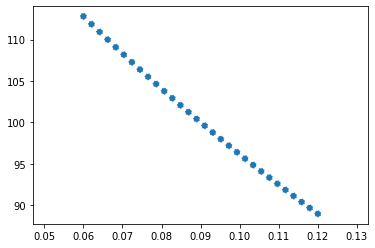

In [27]:
plt.scatter(y,p,ls=':')
plt.show()

In [28]:
p  

array([112.79530426, 111.85022313, 110.91487587, 109.98914979,
       109.0729336 , 108.16611746, 107.26859289, 106.38025281,
       105.50099146, 104.63070445, 103.76928869, 102.91664238,
       102.07266501, 101.23725735, 100.41032138,  99.59176035,
        98.78147869,  97.97938204,  97.18537722,  96.39937221,
        95.62127614,  94.85099929,  94.08845302,  93.33354982,
        92.58620327,  91.846328  ,  91.11383972,  90.38865518,
        89.67069215,  88.95986942])

In [47]:
from sklearn.linear_model import LinearRegression

In [50]:
y=y.reshape(-1,1) 

In [51]:
y

array([[0.06      ],
       [0.06206897],
       [0.06413793],
       [0.0662069 ],
       [0.06827586],
       [0.07034483],
       [0.07241379],
       [0.07448276],
       [0.07655172],
       [0.07862069],
       [0.08068966],
       [0.08275862],
       [0.08482759],
       [0.08689655],
       [0.08896552],
       [0.09103448],
       [0.09310345],
       [0.09517241],
       [0.09724138],
       [0.09931034],
       [0.10137931],
       [0.10344828],
       [0.10551724],
       [0.10758621],
       [0.10965517],
       [0.11172414],
       [0.1137931 ],
       [0.11586207],
       [0.11793103],
       [0.12      ]])

In [52]:
p=p.reshape(-1,1)

In [54]:
p 

array([[112.79530426],
       [111.85022313],
       [110.91487587],
       [109.98914979],
       [109.0729336 ],
       [108.16611746],
       [107.26859289],
       [106.38025281],
       [105.50099146],
       [104.63070445],
       [103.76928869],
       [102.91664238],
       [102.07266501],
       [101.23725735],
       [100.41032138],
       [ 99.59176035],
       [ 98.78147869],
       [ 97.97938204],
       [ 97.18537722],
       [ 96.39937221],
       [ 95.62127614],
       [ 94.85099929],
       [ 94.08845302],
       [ 93.33354982],
       [ 92.58620327],
       [ 91.846328  ],
       [ 91.11383972],
       [ 90.38865518],
       [ 89.67069215],
       [ 88.95986942]])

In [53]:
reg=LinearRegression().fit(y,p)
a,b=reg.coef_,reg.intercept_
print(a,b)

[[-396.67381054]] [136.01306152]


In [62]:
p_predict=a*y+b

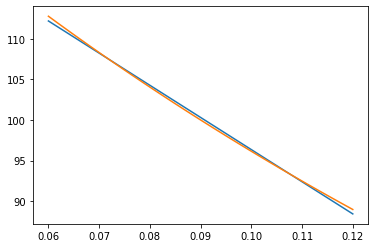

In [64]:
plt.plot(y,p_predict)
plt.plot(y,p)
plt.show()

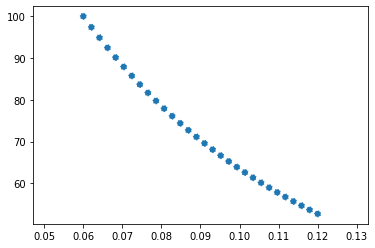

In [66]:
y1=np.linspace(0.06,0.12,30)
p1=6/y1*(1-1/(1+y1/2)**50)+100/(1+y1/2)**50
plt.scatter(y1,p1,ls=':')
plt.show()

In [67]:
y1=y1.reshape(-1,1)
p1=p1.reshape(-1,1)

In [68]:
p_linear=a*y1+b

In [69]:
p_linear

array([[112.21263288],
       [111.39192845],
       [110.57122401],
       [109.75051958],
       [108.92981514],
       [108.10911071],
       [107.28840627],
       [106.46770183],
       [105.6469974 ],
       [104.82629296],
       [104.00558853],
       [103.18488409],
       [102.36417966],
       [101.54347522],
       [100.72277078],
       [ 99.90206635],
       [ 99.08136191],
       [ 98.26065748],
       [ 97.43995304],
       [ 96.61924861],
       [ 95.79854417],
       [ 94.97783974],
       [ 94.1571353 ],
       [ 93.33643086],
       [ 92.51572643],
       [ 91.69502199],
       [ 90.87431756],
       [ 90.05361312],
       [ 89.23290869],
       [ 88.41220425]])

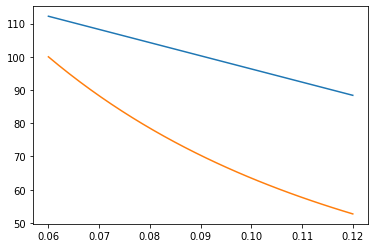

In [70]:
plt.plot(y1,p_linear)
plt.plot(y1,p1)
plt.show()

数学函数解释久期分析

In [65]:
import sympy as sp
import numpy as np

In [71]:
c,r,M,n=sp.symbols('c r M n')
z=c/r*(1-1/(1+r/2)**(2*n))+M/(1+r/2)**(2*n)

In [73]:
zc=sp.diff(z,c)

In [74]:
print(zc)

(1 - (r/2 + 1)**(-2*n))/r


In [75]:
zr=sp.diff(z,r)

In [76]:
print(zr)

-M*n*(r/2 + 1)**(-2*n)/(r/2 + 1) + c*n*(r/2 + 1)**(-2*n)/(r*(r/2 + 1)) - c*(1 - (r/2 + 1)**(-2*n))/r**2


In [77]:
zM=sp.diff(z,M)

In [78]:
print(zM)

(r/2 + 1)**(-2*n)


In [79]:
zn=sp.diff(z,n)

In [80]:
print(zn)

-2*M*(r/2 + 1)**(-2*n)*log(r/2 + 1) + 2*c*(r/2 + 1)**(-2*n)*log(r/2 + 1)/r


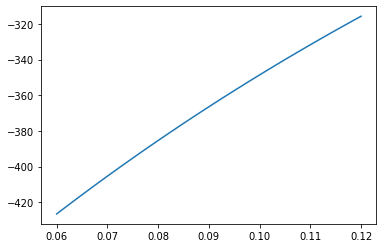

In [87]:
M=100
n=5
c=6
r=np.linspace(0.06,0.12,30)
price=-M*n*(r/2 + 1)**(-2*n)/(r/2 + 1) + c*n*(r/2 + 1)**(-2*n)/(r*(r/2 + 1)) - c*(1 - (r/2 + 1)**(-2*n))/r**2
plt.plot(r,price)
plt.show()

In [114]:
M=100
n=5
c=6
r=0.09
pricechange=-M*n*(r/2 + 1)**(-2*n)/(r/2 + 1) + c*n*(r/2 + 1)**(-2*n)/(r*(r/2 + 1)) - c*(1 - (r/2 + 1)**(-2*n))/r**2
pricechange*0.02             

-7.329141247355872

In [97]:
100-7.9127181771101585  

92.08728182288984

In [95]:
100-11.869077265665236

88.13092273433476

In [89]:
z=c/r*(1-1/(1+r/2)**(2*n))+M/(1+r/2)**(2*n)

In [90]:
z 

array([100.        ,  99.12220569,  98.25361986,  97.39413484,
        96.54364434,  95.70204344,  94.86922855,  94.04509738,
        93.22954897,  92.42248363,  91.62380292,  90.83340968,
        90.05120794,  89.27710299,  88.51100128,  87.75281046,
        87.00243932,  86.25979785,  85.52479711,  84.79734932,
        84.07736779,  83.36476692,  82.65946218,  81.9613701 ,
        81.27040825,  80.58649523,  79.90955067,  79.23949518,
        78.57625038,  77.91973885])

In [ ]:
a b x y=sp.symbols('a b x y')
y=a*x+b 